#### Data Dictionary 

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. 

This study reviewed the literature and used the following 23 variables as explanatory variables:

 - X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

 - X2: Gender (1 = male; 2 = female)
 - X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
 - X4: Marital status (1 = married; 2 = single; 3 = others)
 - X5: Age (year)
 - X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
 - X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
 - X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Data Import and Preview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#You can put the path to the csv file here
path = ""

df = pd.read_csv(path + "default of credit card clients.csv")

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [3]:
# Check distribution for anomolies
df.iloc[:,6:].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Data Cleaning

In [4]:
# Convert unknown value to "others"
df.loc[df.EDUCATION==5,'EDUCATION']=4
df.loc[df.EDUCATION==6,'EDUCATION']=4
df.loc[df.EDUCATION==0,'EDUCATION']=4
df.loc[df.MARRIAGE==0,'MARRIAGE']=3

In [5]:
# Change column names for consistency and simplicity
df.rename(columns = {"default payment next month":"DEFAULT"}, inplace = True)
df.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)

In [6]:
# Change data types of category variable and recode the values 
df[["SEX", "EDUCATION","MARRIAGE","DEFAULT"]] = df.loc[:,("SEX", "EDUCATION","MARRIAGE","DEFAULT")].astype("category")
df["DEFAULT"] = df.loc[:,("DEFAULT")].astype("bool")
df.loc[:, 'SEX'] = df.loc[:, 'SEX'].cat.rename_categories({1: 'male', 2: 'female'})
df.loc[:, 'EDUCATION'] = df.loc[:, 'EDUCATION'].cat.rename_categories({1: 'graduate school', 2: 'university',3:'highschool',4:'others'})
df.loc[:, 'MARRIAGE'] = df.loc[:, 'MARRIAGE'].cat.rename_categories({1: 'married', 2: 'single',3:'others'})

In [7]:
# Create category variables from numerical variables (balance and age)
df["LIMIT_BAL_group"] = pd.qcut(df["LIMIT_BAL"], 5, labels=['lowest','2nd lowest','middle','2nd highest', 'highest'])
bins = [-np.inf, 30, 40,50,60,70, np.inf]
labels =['20s','30s','40s','50s','60s','70s']
df['AGE_group'] = pd.cut(df['AGE'], bins,labels=labels)


# Data Exploration

## Demograhic Attributes

In [8]:
s=df['SEX'].value_counts()
print(s)

female    18112
male      11888
Name: SEX, dtype: int64


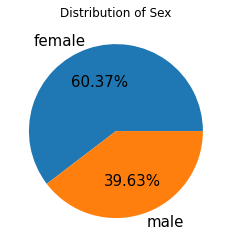

In [9]:
plt.pie(s,labels=s.keys(),autopct='%.2f%%',textprops ={"fontsize":15})
plt.title('Distribution of Sex')
plt.show()

In [10]:
e=df['EDUCATION'].value_counts()
print(e)

university         14030
graduate school    10585
highschool          4917
others               468
Name: EDUCATION, dtype: int64


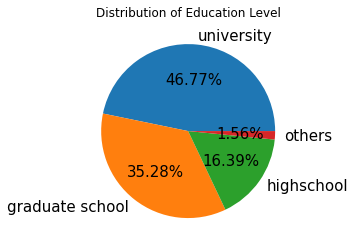

In [11]:
plt.pie(e,labels=e.keys(),autopct='%.2f%%',textprops ={"fontsize":15})
plt.title('Distribution of Education Level')
plt.show()

In [12]:
m=df['MARRIAGE'].value_counts()
print(m)

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64


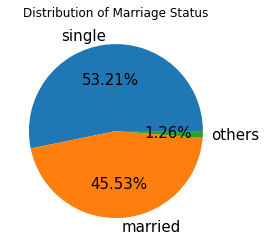

In [13]:
plt.pie(m,labels=m.keys(),autopct='%.2f%%',textprops ={"fontsize":15})
plt.title('Distribution of Marriage Status')
plt.show()

In [14]:
d=df['DEFAULT'].value_counts()
print(d)

False    23364
True      6636
Name: DEFAULT, dtype: int64


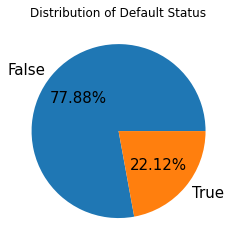

In [15]:
plt.pie(d,labels=d.keys(),autopct='%.2f%%',textprops ={"fontsize":15})
plt.title('Distribution of Default Status')
plt.show()

In [16]:
b=df['LIMIT_BAL_group'].value_counts()
print(b)

lowest         7676
middle         6123
highest        5958
2nd highest    5421
2nd lowest     4822
Name: LIMIT_BAL_group, dtype: int64


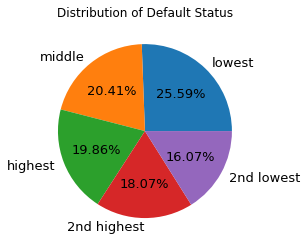

In [17]:
plt.pie(b,labels=b.keys(),autopct='%.2f%%',textprops ={"fontsize":13})
plt.title('Distribution of Default Status')
plt.show()

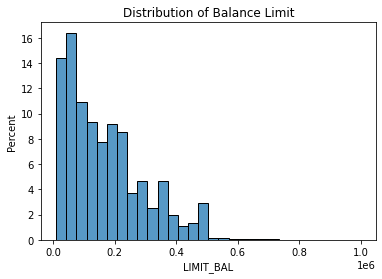

In [18]:
sns.histplot(x = 'LIMIT_BAL',
            data = df, stat='percent', bins=30)
plt.title('Distribution of Balance Limit')
plt.show()

##If an error occurs, use the histogram below

(array([1.2498e+04, 7.8800e+03, 5.0590e+03, 2.7590e+03, 1.5980e+03,
        1.2700e+02, 5.6000e+01, 2.2000e+01, 0.0000e+00, 1.0000e+00]),
 array([  10000.,  109000.,  208000.,  307000.,  406000.,  505000.,
         604000.,  703000.,  802000.,  901000., 1000000.]),
 <BarContainer object of 10 artists>)

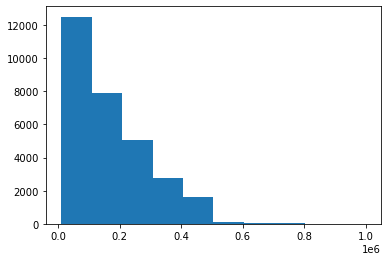

In [19]:
plt.hist(df['LIMIT_BAL'])

In [20]:
a=df['AGE_group'].value_counts()
print(a)

20s    11013
30s    10713
40s     6005
50s     1997
60s      257
70s       15
Name: AGE_group, dtype: int64


In [21]:
a['60s']=a['60s']+a['70s']
a=a.drop(labels = ['70s']) 
print(a)

20s    11013
30s    10713
40s     6005
50s     1997
60s      272
Name: AGE_group, dtype: int64


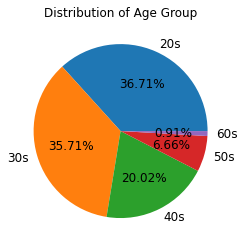

In [22]:
plt.pie(a,labels=a.keys(),autopct='%.2f%%',textprops ={"fontsize":12})
plt.title('Distribution of Age Group')
plt.show()

In [23]:
# Distribution of Limit Balance and Age
bal_dis=df['LIMIT_BAL'].describe(percentiles=[.25])
age_dis=df['AGE'].describe(percentiles=[.25])
print(bal_dis)
print(age_dis)

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64
count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
max         79.000000
Name: AGE, dtype: float64


### Demographic Distribution (in % term) in Defualt and Non-Default Groups

In [24]:
#Separate to two groups(default or not)
dft=df.query('DEFAULT == True')
dff=df.query('DEFAULT == False')

In [25]:
st=round(dft['SEX'].value_counts(normalize=True)*100,2)
sf=round(dff['SEX'].value_counts(normalize=True)*100,2)
print("Sex")
print("Default group:")
print(st)
print("Non-Default group:")
print(sf)

Sex
Default group:
female    56.71
male      43.29
Name: SEX, dtype: float64
Non-Default group:
female    61.41
male      38.59
Name: SEX, dtype: float64


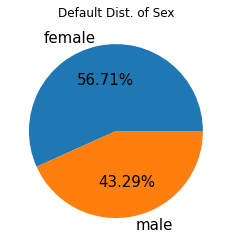

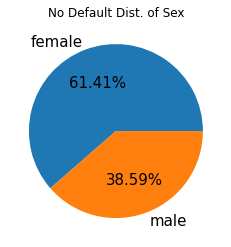

In [26]:
plt.pie(st,labels=st.keys() ,autopct='%.2f%%',textprops ={"fontsize":15})
plt.title('Default Dist. of Sex')
plt.show()

plt.pie(sf,labels=sf.keys(),autopct='%.2f%%',textprops ={"fontsize":15})
plt.title('No Default Dist. of Sex')
plt.show()

In [27]:
et=round(dft['EDUCATION'].value_counts(normalize=True)*100,2)
ef=round(dff['EDUCATION'].value_counts(normalize=True)*100,2)
print("Education")
print("Default group:")
print(et)
print("Non-Default group:")
print(ef)

Education
Default group:
university         50.18
graduate school    30.68
highschool         18.64
others              0.50
Name: EDUCATION, dtype: float64
Non-Default group:
university         45.80
graduate school    36.59
highschool         15.75
others              1.86
Name: EDUCATION, dtype: float64


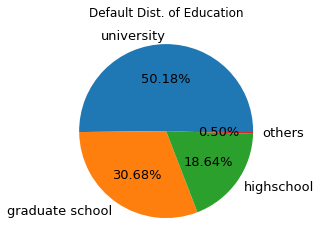

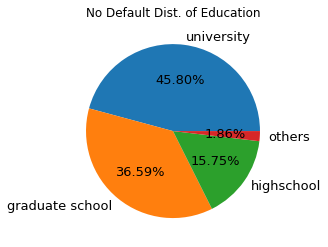

In [28]:
plt.pie(et,labels=et.keys(),autopct='%.2f%%',textprops ={"fontsize":13})
plt.title('Default Dist. of Education')
plt.show()

plt.pie(ef,labels=ef.keys(),autopct='%.2f%%',textprops ={"fontsize":13})
plt.title('No Default Dist. of Education')
plt.show()

In [29]:
mt=round(dft['MARRIAGE'].value_counts(normalize=True)*100,2)
mf=round(dff['MARRIAGE'].value_counts(normalize=True)*100,2)
print("Marriage")
print("Default group:")
print(mt)
print("Non-Default group:")
print(mf)

Marriage
Default group:
single     50.35
married    48.31
others      1.34
Name: MARRIAGE, dtype: float64
Non-Default group:
single     54.03
married    44.74
others      1.23
Name: MARRIAGE, dtype: float64


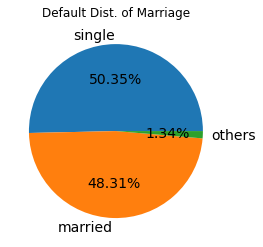

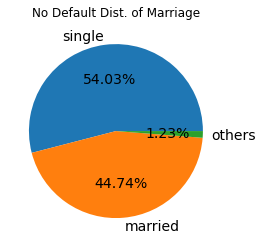

In [30]:
plt.pie(mt,labels=mt.keys(),autopct='%.2f%%',textprops ={"fontsize":14})
plt.title('Default Dist. of Marriage')
plt.show()

plt.pie(mf,labels=mf.keys(),autopct='%.2f%%',textprops ={"fontsize":14})
plt.title('No Default Dist. of Marriage')
plt.show()

In [31]:
bt=round(dft['LIMIT_BAL_group'].value_counts(normalize=True)*100,2)
bf=round(dff['LIMIT_BAL_group'].value_counts(normalize=True)*100,2)
print("Limit Balance Group")
print("Default group:")
print(bt)
print("Non-Default group:")
print(bf)

Limit Balance Group
Default group:
lowest         36.77
2nd lowest     18.75
middle         18.32
2nd highest    13.77
highest        12.39
Name: LIMIT_BAL_group, dtype: float64
Non-Default group:
lowest         22.41
highest        21.98
middle         21.00
2nd highest    19.29
2nd lowest     15.31
Name: LIMIT_BAL_group, dtype: float64


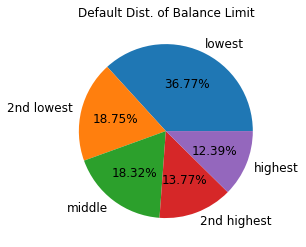

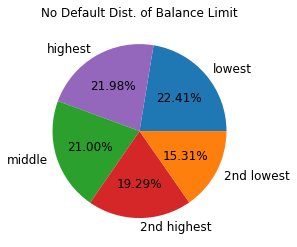

In [32]:
plt.pie(bt,labels=bt.keys(),autopct='%.2f%%',textprops ={"fontsize":12})
plt.title('Default Dist. of Balance Limit')
plt.show()

plt.pie(bf,labels=bf.keys(),autopct='%.2f%%',textprops ={"fontsize":12},
       colors=['#1f77b4','#9467bd','#2ca02c','#d62728','#ff7f0e'])
plt.title('No Default Dist. of Balance Limit')
plt.show()

In [33]:
at=round(dft['AGE_group'].value_counts(normalize=True)*100,2)
af=round(dff['AGE_group'].value_counts(normalize=True)*100,2)
print("Age Group")
print("Default group:")
print(at)
print("Non-Default group:")
print(af)

Age Group
Default group:
20s    37.24
30s    32.99
40s    21.08
50s     7.59
60s     1.02
70s     0.08
Name: AGE_group, dtype: float64
Non-Default group:
20s    36.56
30s    36.48
40s    19.71
50s     6.39
60s     0.81
70s     0.04
Name: AGE_group, dtype: float64


In [34]:
at['60s']=at['60s']+at['70s']
at=at.drop(labels = ['70s']) 
print(at)
af['60s']=af['60s']+af['70s']
af=af.drop(labels = ['70s']) 
print(af)

20s    37.24
30s    32.99
40s    21.08
50s     7.59
60s     1.10
Name: AGE_group, dtype: float64
20s    36.56
30s    36.48
40s    19.71
50s     6.39
60s     0.85
Name: AGE_group, dtype: float64


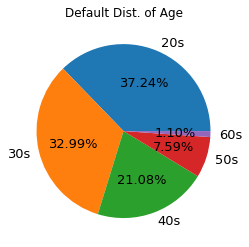

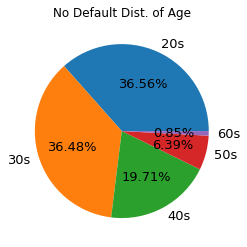

In [35]:
plt.pie(at,labels=at.keys(),autopct='%.2f%%',textprops ={"fontsize":13})
plt.title('Default Dist. of Age')
plt.show()
plt.pie(af,labels=af.keys(),autopct='%.2f%%',textprops ={"fontsize":13})
plt.title('No Default Dist. of Age')
plt.show()

In [36]:
# Balance distribution between Default and Non-Default
bal_dist=dft['LIMIT_BAL'].describe(percentiles=[.25])
bal_disf=dff['LIMIT_BAL'].describe(percentiles=[.25])
print("Limit Balance")
print("Default group:")
print(bal_dist)
print("Non-Default group:")
print(bal_disf)

Limit Balance
Default group:
count      6636.000000
mean     130109.656420
std      115378.540571
min       10000.000000
25%       50000.000000
50%       90000.000000
max      740000.000000
Name: LIMIT_BAL, dtype: float64
Non-Default group:
count      23364.000000
mean      178099.726074
std       131628.359660
min        10000.000000
25%        70000.000000
50%       150000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


In [37]:
age_dist=dff['AGE'].describe(percentiles=[.25])
age_disf=dff['AGE'].describe(percentiles=[.25])
print("Age")
print("Default group:")
print(age_dist)
print("Non-Default group:")
print(age_disf)

Age
Default group:
count    23364.000000
mean        35.417266
std          9.077355
min         21.000000
25%         28.000000
50%         34.000000
max         79.000000
Name: AGE, dtype: float64
Non-Default group:
count    23364.000000
mean        35.417266
std          9.077355
min         21.000000
25%         28.000000
50%         34.000000
max         79.000000
Name: AGE, dtype: float64


### %Default in Each Demographic Group 

In [38]:
round(df.groupby("LIMIT_BAL_group")["DEFAULT"].apply(np.mean)*100,2)

LIMIT_BAL_group
lowest         31.79
2nd lowest     25.80
middle         19.86
2nd highest    16.86
highest        13.80
Name: DEFAULT, dtype: float64

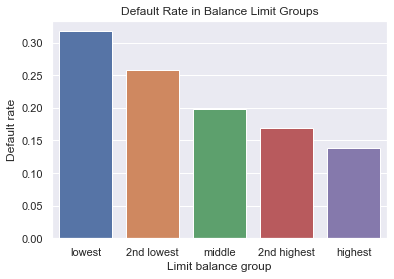

In [39]:
sns.set(font_scale = 1)
sns.barplot(x=df.groupby("LIMIT_BAL_group")["DEFAULT"].apply(np.mean).keys(),
           y=df.groupby("LIMIT_BAL_group")["DEFAULT"].apply(np.mean),saturation=0.8)
plt.xlabel("Limit balance group")
plt.ylabel('Default rate')
plt.title('Default Rate in Balance Limit Groups')
plt.show()

In [40]:
round(df.groupby("SEX")["DEFAULT"].apply(np.mean)*100,2)

SEX
male      24.17
female    20.78
Name: DEFAULT, dtype: float64

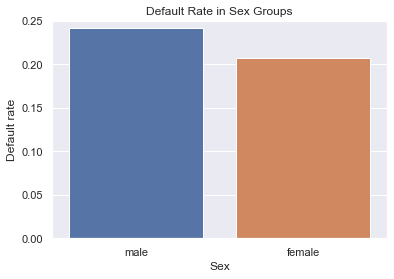

In [41]:
fig, ax = plt.subplots()
sns.barplot(x=df.groupby("SEX")["DEFAULT"].apply(np.mean).keys(),
           y=df.groupby("SEX")["DEFAULT"].apply(np.mean),saturation=0.8,ax=ax)
ax.set_ylim(0,0.25)
plt.xlabel("Sex")
plt.ylabel('Default rate')
plt.title('Default Rate in Sex Groups')
plt.show()

In [42]:
round(df.groupby("EDUCATION")["DEFAULT"].apply(np.mean)*100,2)

EDUCATION
graduate school    19.23
university         23.73
highschool         25.16
others              7.05
Name: DEFAULT, dtype: float64

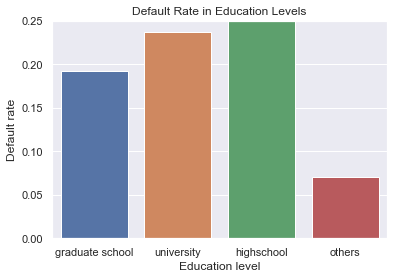

In [43]:
fig, ax = plt.subplots()
sns.barplot(x=df.groupby("EDUCATION")["DEFAULT"].apply(np.mean).keys(),
           y=df.groupby("EDUCATION")["DEFAULT"].apply(np.mean),saturation=0.8)
ax.set_ylim(0,0.25)
plt.xlabel("Education level")
plt.ylabel('Default rate')
plt.title('Default Rate in Education Levels')
plt.show()

In [44]:
round(df.groupby("MARRIAGE")["DEFAULT"].apply(np.mean)*100,2)

MARRIAGE
married    23.47
single     20.93
others     23.61
Name: DEFAULT, dtype: float64

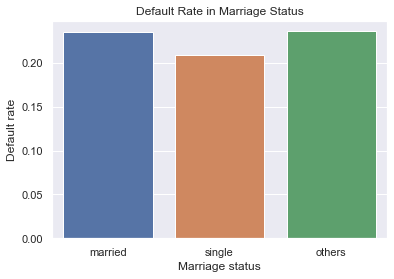

In [45]:
sns.barplot(x=df.groupby("MARRIAGE")["DEFAULT"].apply(np.mean).keys(),
           y=df.groupby("MARRIAGE")["DEFAULT"].apply(np.mean),saturation=0.8)
plt.xlabel("Marriage status")
plt.ylabel('Default rate')
plt.title('Default Rate in Marriage Status')
plt.show()

In [46]:
round(df.groupby("AGE_group")["DEFAULT"].apply(np.mean)*100,2)

AGE_group
20s    22.44
30s    20.43
40s    23.30
50s    25.24
60s    26.46
70s    33.33
Name: DEFAULT, dtype: float64

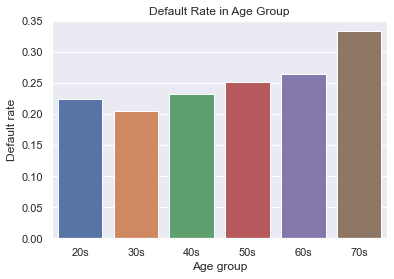

In [47]:
sns.barplot(x=df.groupby("AGE_group")["DEFAULT"].apply(np.mean).keys(),
           y=df.groupby("AGE_group")["DEFAULT"].apply(np.mean),saturation=0.8)
plt.xlabel("Age group")
plt.ylabel('Default rate')
plt.title('Default Rate in Age Group')
plt.show()

## Financial Variables

In [48]:
cols_pay = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
cols_bill = ["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
cols_pay_amt = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

In [49]:
for col in cols_pay:
    print(col)
    print(df[col].value_counts())

PAY_1
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64
PAY_5
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
PAY_6
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


Found 0 and -2, which are not explained in the description. However, refering to Kaggle website, we assume that -2 corresponds to there being no credit to pay and 0 corresponds to a payment being made on time but not the total amount to clear the balance. 

(Reference: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/157664)

In [50]:
df[cols_pay_amt].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [51]:
df[cols_bill].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Found that there are negative values for the amount of bill statement.

In [52]:
df[df[cols_bill[0]] < 0][cols_bill]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
26,-109,-425,259,-57,127,-189
68,-190,-9850,-9850,10311,10161,7319
92,-2000,5555,0,0,0,0
101,-81,-303,32475,32891,33564,34056
109,-103,-103,-103,-103,-103,-103
...,...,...,...,...,...,...
29845,-265,-265,5235,5007,4779,7680
29851,-16,3326,-54,-54,19315,8388
29922,-18,-18,-18,-18,-18,-18
29962,-264,264,264,7300,0,0


In [53]:
# Convert negative values into 0 for BILL_AMT1 to 6
for col in cols_bill:
    df.loc[df[col] < 0, col] = 0
#Confirm there is no longer negative value
df[df[cols_bill[0]] < 0][cols_bill]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6


### Examine Correlation Between Default Payment and PAY_1 to 6

In [54]:
#At first, create a subset containing PAY_1 to 6 and DEFAULT
sub_columns = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "DEFAULT"]
sub_df = df[sub_columns]
sub_df

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
0,2,2,-1,-1,-2,-2,True
1,-1,2,0,0,0,2,True
2,0,0,0,0,0,0,False
3,0,0,0,0,0,0,False
4,-1,0,-1,0,0,0,False
...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,False
29996,-1,-1,-1,-1,0,0,False
29997,4,3,2,-1,0,0,True
29998,1,-1,0,0,0,-1,True


In [55]:
#calculate correlation for each pair of variables in the subset
corr = sub_df.corr()
corr

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
PAY_1,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.324794
PAY_2,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.263551
PAY_3,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.235253
PAY_4,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.216614
PAY_5,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.204149
PAY_6,0.474553,0.575501,0.632684,0.716449,0.816900,1.000000,0.186866
DEFAULT,0.324794,0.263551,0.235253,0.216614,0.204149,0.186866,1.000000


[Text(0.5, 1.0, 'Correlation of Default and PAY_1 to 6')]

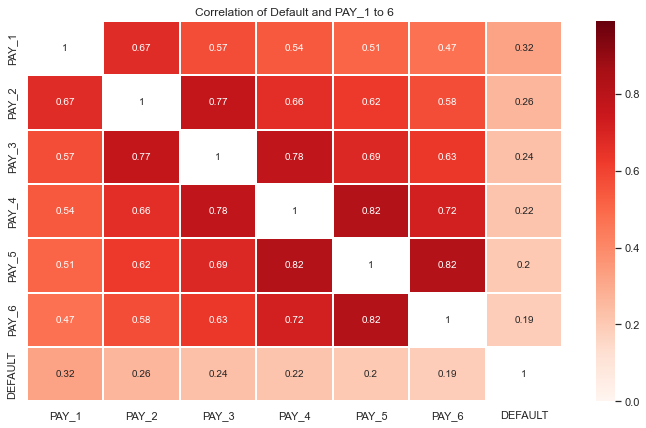

In [56]:
#Create a heatmap based on the correlation
%matplotlib inline
from copy import copy
fig, ax = plt.subplots(figsize = (12, 7))
my_cmap = copy(plt.cm.Reds)
my_cmap.set_over("white")
sns.heatmap(corr, cmap =my_cmap,vmin=0, vmax=0.99, linewidths = 0.30, annot = True).set(title='Correlation of Default and PAY_1 to 6')

In [57]:
#Using the output above, focus on the correlation of default variable and PAY_1 to 6
corr_default = corr.iloc[:-1, -1]
corr_default.sort_values(ascending = False)

PAY_1    0.324794
PAY_2    0.263551
PAY_3    0.235253
PAY_4    0.216614
PAY_5    0.204149
PAY_6    0.186866
Name: DEFAULT, dtype: float64

Text(0.5, 1.0, 'Correlation of DEFAULT and monthly repayment status')

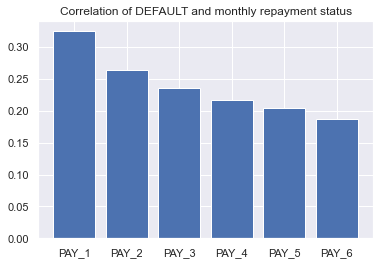

In [58]:
%matplotlib inline
plt.bar(corr_default.index, corr_default)
plt.title('Correlation of DEFAULT and monthly repayment status')

### Compare the rate of payment delay in the past 6 months among default and non-default groups

In [59]:
#Create dummy variables for whether each person has delayed payment or not based on PAY_1 to 6
def delayed_or_not(pay):
    if pay > 0:
        return 1
    else:
        return 0

df["PAY_1_delayed"] = df["PAY_1"].apply(delayed_or_not)
df["PAY_2_delayed"] = df["PAY_2"].apply(delayed_or_not)
df["PAY_3_delayed"] = df["PAY_3"].apply(delayed_or_not)
df["PAY_4_delayed"] = df["PAY_4"].apply(delayed_or_not)
df["PAY_5_delayed"] = df["PAY_5"].apply(delayed_or_not)
df["PAY_6_delayed"] = df["PAY_6"].apply(delayed_or_not)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT6,DEFAULT,LIMIT_BAL_group,AGE_group,PAY_1_delayed,PAY_2_delayed,PAY_3_delayed,PAY_4_delayed,PAY_5_delayed,PAY_6_delayed
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,True,lowest,20s,1,1,0,0,0,0
1,2,120000,female,university,single,26,-1,2,0,0,...,2000,True,middle,20s,0,1,0,0,0,1
2,3,90000,female,university,single,34,0,0,0,0,...,5000,False,2nd lowest,30s,0,0,0,0,0,0
3,4,50000,female,university,married,37,0,0,0,0,...,1000,False,lowest,30s,0,0,0,0,0,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,679,False,lowest,50s,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,highschool,married,39,0,0,0,0,...,1000,False,2nd highest,30s,0,0,0,0,0,0
29996,29997,150000,male,highschool,single,43,-1,-1,-1,-1,...,0,False,middle,40s,0,0,0,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,...,3100,True,lowest,30s,1,1,1,0,0,0
29998,29999,80000,male,highschool,married,41,1,-1,0,0,...,1804,True,2nd lowest,40s,1,0,0,0,0,0


In [60]:
grouped_df = df.groupby("DEFAULT")
table = grouped_df[["PAY_1_delayed", "PAY_2_delayed", "PAY_3_delayed", "PAY_4_delayed", "PAY_5_delayed", "PAY_6_delayed"]].apply(np.mean)
table

C:\Users\Ktktim\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,PAY_1_delayed,PAY_2_delayed,PAY_3_delayed,PAY_4_delayed,PAY_5_delayed,PAY_6_delayed
DEFAULT,,,,,,
False,0.145052,0.083975,0.086073,0.069808,0.056454,0.062832
True,0.516727,0.373116,0.331826,0.283153,0.248493,0.242767


Text(0.5, 1.0, 'Rate of payment delay at each period between default and non-default')

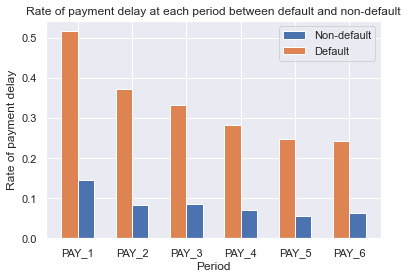

In [61]:
%matplotlib inline
x = ["PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
plt.bar(x, table.iloc[0,], align="edge", width=0.3)
plt.bar(x, table.iloc[1,], align="edge", width=-0.3)
plt.legend(['Non-default', 'Default'])
plt.xlabel('Period')
plt.ylabel("Rate of payment delay")
plt.title('Rate of payment delay at each period between default and non-default')

### Find the longest period of payment delay and caluculate the default rate for each group

In [62]:
def max_payment(df):
    max_pay = max([df.PAY_1, df.PAY_2, df.PAY_3, df.PAY_4, df.PAY_5, df.PAY_6])
    if max_pay <= 0:
        return 0
    else:
        return int(max_pay)

df["max_pay"] = df.apply(max_payment, axis=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,DEFAULT,LIMIT_BAL_group,AGE_group,PAY_1_delayed,PAY_2_delayed,PAY_3_delayed,PAY_4_delayed,PAY_5_delayed,PAY_6_delayed,max_pay
0,1,20000,female,university,married,24,2,2,-1,-1,...,True,lowest,20s,1,1,0,0,0,0,2
1,2,120000,female,university,single,26,-1,2,0,0,...,True,middle,20s,0,1,0,0,0,1,2
2,3,90000,female,university,single,34,0,0,0,0,...,False,2nd lowest,30s,0,0,0,0,0,0,0
3,4,50000,female,university,married,37,0,0,0,0,...,False,lowest,30s,0,0,0,0,0,0,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,False,lowest,50s,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,highschool,married,39,0,0,0,0,...,False,2nd highest,30s,0,0,0,0,0,0,0
29996,29997,150000,male,highschool,single,43,-1,-1,-1,-1,...,False,middle,40s,0,0,0,0,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,...,True,lowest,30s,1,1,1,0,0,0,4
29998,29999,80000,male,highschool,married,41,1,-1,0,0,...,True,2nd lowest,40s,1,0,0,0,0,0,1


In [63]:
#calculate the default rate for each group
grouped_max = df.groupby("max_pay")
default = grouped_max["DEFAULT"].apply(np.mean)
default

max_pay
0    0.117104
1    0.249852
2    0.435509
3    0.622307
4    0.642202
5    0.507246
6    0.560000
7    0.835821
8    0.560000
Name: DEFAULT, dtype: float64

Text(0.5, 1.0, 'Default rate for each length of longest payment delay')

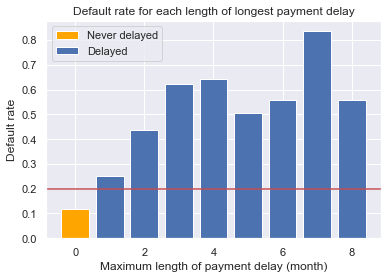

In [64]:
%matplotlib inline
plt.bar(default.index[:1], default[:1], color = "orange")
plt.bar(default.index[1:], default[1:], color = "b")
plt.legend(['Never delayed', 'Delayed'])
plt.axhline(y=0.2, color = "r")
plt.xlabel('Maximum length of payment delay (month)')
plt.ylabel("Default rate")
plt.title('Default rate for each length of longest payment delay')

### Calculate variance and mean of BILL_AMT1 to 6/PAY_AMT1 to 6 for each person and create 5 groups based on those values

In [65]:
def var_bill(df):
    var = np.var([df.BILL_AMT1, df.BILL_AMT2, df.BILL_AMT3, df.BILL_AMT4, df.BILL_AMT5, df.BILL_AMT6])
    return var

def var_pay(df):
    var = np.var([df.PAY_AMT1, df.PAY_AMT2, df.PAY_AMT3, df.PAY_AMT4, df.PAY_AMT5, df.PAY_AMT6])
    return var

def mean_bill(df):
    mean = np.mean([df.BILL_AMT1, df.BILL_AMT2, df.BILL_AMT3, df.BILL_AMT4, df.BILL_AMT5, df.BILL_AMT6])
    return mean

def mean_pay(df):
    mean = np.mean([df.PAY_AMT1, df.PAY_AMT2, df.PAY_AMT3, df.PAY_AMT4, df.PAY_AMT5, df.PAY_AMT6])
    return mean

In [66]:
df["var_bill"] = df.apply(var_bill, axis=1)
df["var_pay"] = df.apply(var_pay, axis=1)
df["mean_bill"] = df.apply(mean_bill, axis=1)
df["mean_pay"] = df.apply(mean_pay, axis=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_2_delayed,PAY_3_delayed,PAY_4_delayed,PAY_5_delayed,PAY_6_delayed,max_pay,var_bill,var_pay,mean_bill,mean_pay
0,1,20000,female,university,married,24,2,2,-1,-1,...,1,0,0,0,0,2,2.586126e+06,6.593347e+04,1284.000000,114.833333
1,2,120000,female,university,single,26,-1,2,0,0,...,1,0,0,0,1,2,3.391691e+05,4.722222e+05,2846.166667,833.333333
2,3,90000,female,university,single,34,0,0,0,0,...,0,0,0,0,0,0,3.064865e+07,2.053601e+06,16942.166667,1836.333333
3,4,50000,female,university,married,37,0,0,0,0,...,0,0,0,0,0,0,9.302999e+07,1.904497e+05,38555.666667,1398.000000
4,5,50000,male,university,married,57,-1,0,-1,0,...,0,0,0,0,0,0,9.484901e+07,1.583835e+08,18223.166667,9841.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,highschool,married,39,0,0,0,0,...,0,0,0,0,0,0,6.263705e+09,3.846897e+07,120891.500000,7091.666667
29996,29997,150000,male,highschool,single,43,-1,-1,-1,-1,...,0,0,0,0,0,0,8.536183e+06,1.029909e+07,3530.333333,2415.000000
29997,29998,30000,male,university,single,37,4,3,2,-1,...,1,1,0,0,0,4,7.291676e+07,5.866139e+07,11749.333333,5216.666667
29998,29999,80000,male,highschool,married,41,1,-1,0,0,...,0,0,0,0,0,1,8.821954e+08,1.098932e+09,44709.333333,24530.166667


In [67]:
#Divide people into 5 groups based on variance or mean
df["var_bill_group"] = pd.qcut(df["var_bill"], 5, labels=['lowest','2nd lowest','middle','2nd highest', 'highest'])
df["var_pay_group"] = pd.qcut(df["var_pay"], 5, labels=['lowest','2nd lowest','middle','2nd highest', 'highest'])
df["mean_bill_group"] = pd.qcut(df["mean_bill"], 5, labels=['lowest','2nd lowest','middle','2nd highest', 'highest'])
df["mean_pay_group"] = pd.qcut(df["mean_pay"], 5, labels=['lowest','2nd lowest','middle','2nd highest', 'highest'])
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_6_delayed,max_pay,var_bill,var_pay,mean_bill,mean_pay,var_bill_group,var_pay_group,mean_bill_group,mean_pay_group
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,2,2.586126e+06,6.593347e+04,1284.000000,114.833333,2nd lowest,lowest,lowest,lowest
1,2,120000,female,university,single,26,-1,2,0,0,...,1,2,3.391691e+05,4.722222e+05,2846.166667,833.333333,lowest,2nd lowest,lowest,lowest
2,3,90000,female,university,single,34,0,0,0,0,...,0,0,3.064865e+07,2.053601e+06,16942.166667,1836.333333,middle,middle,middle,middle
3,4,50000,female,university,married,37,0,0,0,0,...,0,0,9.302999e+07,1.904497e+05,38555.666667,1398.000000,2nd highest,lowest,2nd highest,2nd lowest
4,5,50000,male,university,married,57,-1,0,-1,0,...,0,0,9.484901e+07,1.583835e+08,18223.166667,9841.500000,2nd highest,highest,middle,highest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,highschool,married,39,0,0,0,0,...,0,0,6.263705e+09,3.846897e+07,120891.500000,7091.666667,highest,highest,highest,highest
29996,29997,150000,male,highschool,single,43,-1,-1,-1,-1,...,0,0,8.536183e+06,1.029909e+07,3530.333333,2415.000000,middle,2nd highest,2nd lowest,middle
29997,29998,30000,male,university,single,37,4,3,2,-1,...,0,4,7.291676e+07,5.866139e+07,11749.333333,5216.666667,2nd highest,highest,2nd lowest,2nd highest
29998,29999,80000,male,highschool,married,41,1,-1,0,0,...,0,1,8.821954e+08,1.098932e+09,44709.333333,24530.166667,highest,highest,2nd highest,highest


In [68]:
print(f"Corr. of default and var_bill: {df['DEFAULT'].corr(df['var_bill'])}")
print(f"Corr. of default and var_pay: {df['DEFAULT'].corr(df['var_pay'])}")
print(f"Corr. of default and mean_bill: {df['DEFAULT'].corr(df['mean_bill'])}")
print(f"Corr. of default and mean_pay: {df['DEFAULT'].corr(df['mean_pay'])}")

Corr. of default and var_bill: -0.023946042679627536
Corr. of default and var_pay: -0.020170175790367187
Corr. of default and mean_bill: -0.012673443578386703
Corr. of default and mean_pay: -0.1023543884434952


### Calculate default ratio for each group

In [69]:
var_bill = df.groupby("var_bill_group")["DEFAULT"].apply(np.mean)
var_bill

var_bill_group
lowest         0.304667
2nd lowest     0.291000
middle         0.182667
2nd highest    0.165333
highest        0.162333
Name: DEFAULT, dtype: float64

Text(0.5, 1.0, 'Default rate for each group based on variance of bill amount')

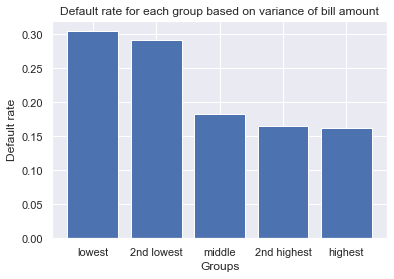

In [70]:
%matplotlib inline
plt.bar(var_bill.index, var_bill)
plt.xlabel('Groups')
plt.ylabel("Default rate")
plt.title('Default rate for each group based on variance of bill amount')

In [71]:
var_pay = df.groupby("var_pay_group")["DEFAULT"].apply(np.mean)
var_pay

var_pay_group
lowest         0.253833
2nd lowest     0.243927
middle         0.265479
2nd highest    0.208626
highest        0.134000
Name: DEFAULT, dtype: float64

Text(0.5, 1.0, 'Default rate for each group based on variance of payment')

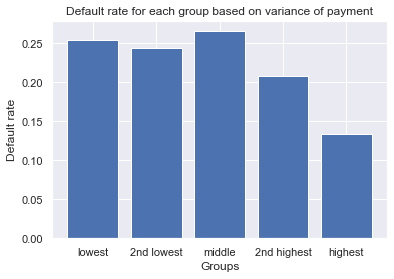

In [72]:
%matplotlib inline
plt.bar(var_pay.index, var_pay)
plt.xlabel('Groups')
plt.ylabel("Default rate")
plt.title('Default rate for each group based on variance of payment')

In [73]:
mean_bill = df.groupby("mean_bill_group")["DEFAULT"].apply(np.mean)
mean_bill

mean_bill_group
lowest         0.254167
2nd lowest     0.191500
middle         0.243167
2nd highest    0.215000
highest        0.202167
Name: DEFAULT, dtype: float64

Text(0.5, 1.0, 'Default rate for each group based on mean of bill amount')

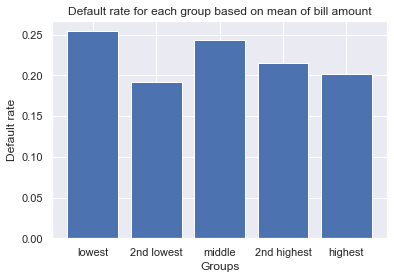

In [74]:
%matplotlib inline
plt.bar(mean_bill.index, mean_bill)
plt.xlabel('Groups')
plt.ylabel("Default rate")
plt.title('Default rate for each group based on mean of bill amount')

In [75]:
mean_pay = df.groupby("mean_pay_group")["DEFAULT"].apply(np.mean)
mean_pay

mean_pay_group
lowest         0.316333
2nd lowest     0.276500
middle         0.220167
2nd highest    0.172500
highest        0.120500
Name: DEFAULT, dtype: float64

Text(0.5, 1.0, 'Default rate for each group based on mean of payment')

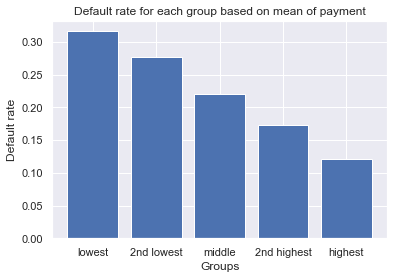

In [76]:
%matplotlib inline
plt.bar(mean_pay.index, mean_pay)
plt.xlabel('Groups')
plt.ylabel("Default rate")
plt.title('Default rate for each group based on mean of payment')

### Separate people based on whether they previously delayed their repayment at least one before and caluculate default ratio for each group

In [77]:
def delayed_before(df):
    max_pay = max([df.PAY_1, df.PAY_2, df.PAY_3, df.PAY_4, df.PAY_5, df.PAY_6])
    if max_pay > 0:
        return 1
    else:
        return 0

df["delayed_before"] = df.apply(delayed_before, axis=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,max_pay,var_bill,var_pay,mean_bill,mean_pay,var_bill_group,var_pay_group,mean_bill_group,mean_pay_group,delayed_before
0,1,20000,female,university,married,24,2,2,-1,-1,...,2,2.586126e+06,6.593347e+04,1284.000000,114.833333,2nd lowest,lowest,lowest,lowest,1
1,2,120000,female,university,single,26,-1,2,0,0,...,2,3.391691e+05,4.722222e+05,2846.166667,833.333333,lowest,2nd lowest,lowest,lowest,1
2,3,90000,female,university,single,34,0,0,0,0,...,0,3.064865e+07,2.053601e+06,16942.166667,1836.333333,middle,middle,middle,middle,0
3,4,50000,female,university,married,37,0,0,0,0,...,0,9.302999e+07,1.904497e+05,38555.666667,1398.000000,2nd highest,lowest,2nd highest,2nd lowest,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,0,9.484901e+07,1.583835e+08,18223.166667,9841.500000,2nd highest,highest,middle,highest,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,highschool,married,39,0,0,0,0,...,0,6.263705e+09,3.846897e+07,120891.500000,7091.666667,highest,highest,highest,highest,0
29996,29997,150000,male,highschool,single,43,-1,-1,-1,-1,...,0,8.536183e+06,1.029909e+07,3530.333333,2415.000000,middle,2nd highest,2nd lowest,middle,0
29997,29998,30000,male,university,single,37,4,3,2,-1,...,4,7.291676e+07,5.866139e+07,11749.333333,5216.666667,2nd highest,highest,2nd lowest,2nd highest,1
29998,29999,80000,male,highschool,married,41,1,-1,0,0,...,1,8.821954e+08,1.098932e+09,44709.333333,24530.166667,highest,highest,2nd highest,highest,1


In [78]:
default2 = df.groupby("delayed_before")["DEFAULT"].apply(np.mean)
default2

delayed_before
0    0.117104
1    0.427252
Name: DEFAULT, dtype: float64

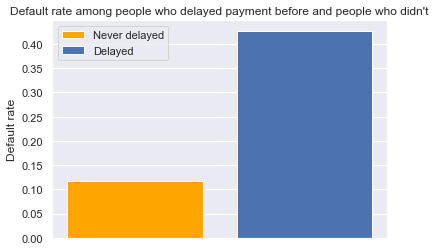

In [79]:
%matplotlib inline
plt.bar(default2.index[0], default2[0], color = "orange")
plt.bar(default2.index[1], default2[1], color = "b")
plt.legend(['Never delayed', 'Delayed'])
plt.ylabel("Default rate")
plt.title('Default rate among people who delayed payment before and people who didn\'t')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)


# Cross-Attributes Analysis (Pivot Table)

## Default Rates in Each Gender and Age Group

In [80]:
gender_age = pd.pivot_table(df,values=['DEFAULT'],index=['AGE_group'],columns=['SEX'],aggfunc=np.mean)
gender_age

DEFAULT          
SEX            male    female
AGE_group                    
20s        0.237637  0.217264
30s        0.232180  0.185197
40s        0.250483  0.219719
50s        0.275607  0.231429
60s        0.250000  0.282051
70s        0.333333  0.333333

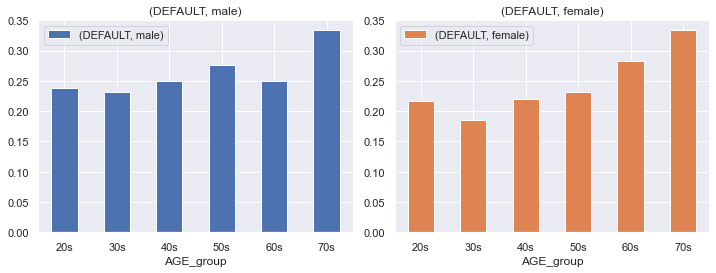

In [81]:
#Plot the pivot table
%matplotlib inline
gender_age.plot(kind='bar', subplots=True, rot=0, figsize=(15, 7), layout=(2, 3))
plt.tight_layout()


## Default Rates in Each Gender and Limit Balance Group

In [82]:
gender_limit = pd.pivot_table(df,values=['DEFAULT'],index=['LIMIT_BAL_group'],columns=['SEX'],aggfunc=np.mean)
gender_limit

DEFAULT          
SEX                  male    female
LIMIT_BAL_group                    
lowest           0.319732  0.316123
2nd lowest       0.280025  0.246708
middle           0.228452  0.182346
2nd highest      0.195675  0.153492
highest          0.144796  0.133258

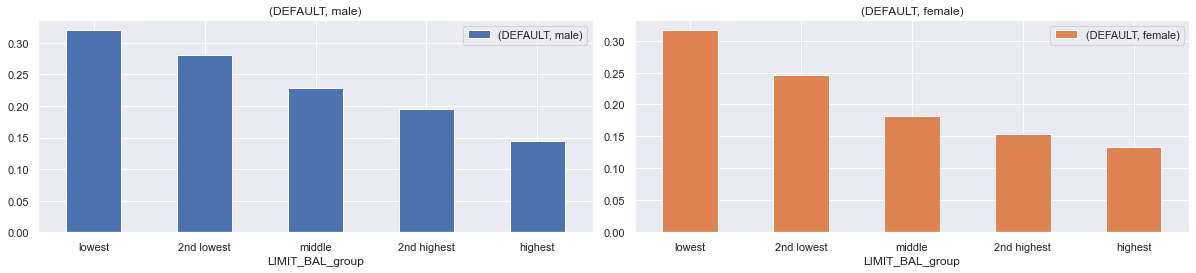

In [83]:
#Plot the pivot table
%matplotlib inline
gender_limit.plot(kind='bar', subplots=True, rot=0, figsize=(25, 7), layout=(2, 3))
plt.tight_layout()

# Modeling

## Feature Engineering by Creating Interactions Between Variables

In [84]:
# (1) history of late payments
def late_payment(df):
    max_pay = max([df.PAY_1, df.PAY_2, df.PAY_3, 
                   df.PAY_4, df.PAY_5, df.PAY_6])
    if max_pay <= 0: # always pay duly
        result = "duly"
    elif 0 < max_pay <= 2: # mildly late
        result = "mildly_late"
    else: # severely late
        result = "severely_late"
    return result

# (2) % bill to credit limit ratio
def bill_to_credit(df):
    bill_to_credit_past6mo = []
    for item in ["BILL_AMT"+str(w) for w in range(1,7)]:
        bill_to_credit = df[item]*100/df["LIMIT_BAL"]
        bill_to_credit_past6mo.append(bill_to_credit)
    return np.mean(bill_to_credit_past6mo)

# (3) % payment to bill ratio 
def payment_to_bill(df):
    payment_to_bill_past5mo = []
    for i in range(1,5):
        try:
            payment_to_bill = df["PAY_AMT"+str(i)]*100/df["BILL_AMT"+str(i+1)] 
        except ZeroDivisionError:
            payment_to_bill = 0
        payment_to_bill_past5mo.append(payment_to_bill)
    return np.mean(payment_to_bill_past5mo)

In [85]:
# Normalize (1) and (2)
def Min_Max_Scaler(lst):
    Max = np.percentile(lst, 99)
    Min = np.percentile(lst, 1)
    lst = np.where(lst > Max, Max, lst)
    lst = np.where(lst < Min, Min, lst)
    return [(x - Min)/(Max - Min) for x in lst]

In [86]:
# Apply featue engineering functions to the data
df["BILL_TO_CREDIT"] = df.apply(bill_to_credit, axis = 1)
df["PAYMENT_TO_BILL"] = df.apply(payment_to_bill, axis = 1)
df["LATE_PAYMENT"] = df.apply(late_payment, axis = 1).astype("category")
# Normalize (1) and (2)
df["BILL_TO_CREDIT"] = Min_Max_Scaler(df["BILL_TO_CREDIT"])
df["PAYMENT_TO_BILL"] = Min_Max_Scaler(df["PAYMENT_TO_BILL"])


In [87]:
# Create another set of boolean variables based on median values
df["BILL_TO_CREDIT_higher_than_med"] = (df["BILL_TO_CREDIT"] > df["BILL_TO_CREDIT"].median()).astype(int)
df["PAYMENT_TO_BILL_higher_than_med"] = (df["PAYMENT_TO_BILL"] > df["PAYMENT_TO_BILL"].median()).astype(int)


In [88]:
# Re-Bin the Age_Group variable to reduce dimensions
bins = [-np.inf,30,60,np.inf]
labels =['Young adults (20 - 30)','Adults (31 - 60)', 'Retired (60+)']
df['AGE_group_new'] = pd.cut(df['AGE'], bins,labels=labels)

In [89]:
# Create DV and IVs
y = df["DEFAULT"]
X_logis = df.loc[:, ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE_group_new', 
               "BILL_TO_CREDIT_higher_than_med",
               "PAYMENT_TO_BILL_higher_than_med",
                "LATE_PAYMENT"
              ]
          ]

X = df.loc[:, ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
               "BILL_TO_CREDIT",
               "PAYMENT_TO_BILL",
                "LATE_PAYMENT",
                'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
                'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
              ]
          ]

In [90]:
# Convert category variables to dummies
X_logis = pd.get_dummies(X_logis, columns = ['SEX', 'EDUCATION', 'MARRIAGE', "AGE_group_new", "LATE_PAYMENT"], drop_first = True)
X_logis
X = pd.get_dummies(X, columns = ['SEX', 'EDUCATION', 'MARRIAGE', "LATE_PAYMENT"], drop_first = True)
X

,AGE,BILL_TO_CREDIT,PAYMENT_TO_BILL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT5,PAY_AMT6,SEX_female,EDUCATION_university,EDUCATION_highschool,EDUCATION_others,MARRIAGE_single,MARRIAGE_others,LATE_PAYMENT_mildly_late,LATE_PAYMENT_severely_late
0,24,0.061206,0.200000,2,2,-1,-1,-2,-2,3913,...,0,0,1,1,0,0,0,0,1,0
1,26,0.022612,0.193583,-1,2,0,0,0,2,2682,...,0,2000,1,1,0,0,1,0,1,0
2,34,0.179468,0.071105,0,0,0,0,0,0,29239,...,1000,5000,1,1,0,0,1,0,0,0
3,37,0.735157,0.032559,0,0,0,0,0,0,46990,...,1069,1000,1,1,0,0,0,0,0,0
4,57,0.347469,0.464794,-1,0,-1,0,0,0,8617,...,689,679,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,39,0.523883,0.058893,0,0,0,0,0,0,188948,...,5000,1000,0,0,1,0,0,0,0,0
29996,43,0.022438,0.607750,-1,-1,-1,-1,0,0,1683,...,0,0,0,0,1,0,1,0,0,0
29997,37,0.373382,0.251561,4,3,2,-1,0,0,3565,...,2000,3100,0,1,0,0,1,0,0,1
29998,41,0.532807,0.265084,1,-1,0,0,0,-1,0,...,52964,1804,0,0,1,0,0,0,1,0


In [91]:
# Check IVs
for index, value in enumerate(X.columns):
    print(index, value)

0 AGE
1 BILL_TO_CREDIT
2 PAYMENT_TO_BILL
3 PAY_1
4 PAY_2
5 PAY_3
6 PAY_4
7 PAY_5
8 PAY_6
9 BILL_AMT1
10 BILL_AMT2
11 BILL_AMT3
12 BILL_AMT4
13 BILL_AMT5
14 BILL_AMT6
15 PAY_AMT1
16 PAY_AMT2
17 PAY_AMT3
18 PAY_AMT4
19 PAY_AMT5
20 PAY_AMT6
21 SEX_female
22 EDUCATION_university
23 EDUCATION_highschool
24 EDUCATION_others
25 MARRIAGE_single
26 MARRIAGE_others
27 LATE_PAYMENT_mildly_late
28 LATE_PAYMENT_severely_late


## Feature Visualization

[Text(0.5, 1.0, 'Financial Behaviors of Default vs. Non-Default Customers')]

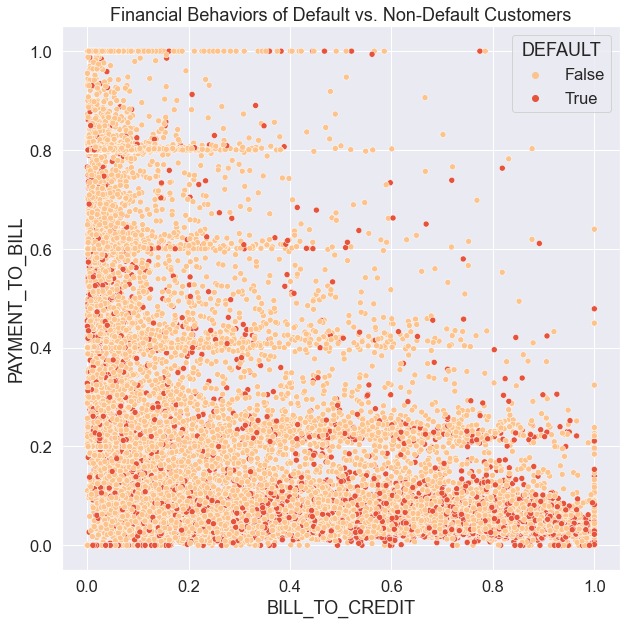

In [92]:
%matplotlib inline
plt.figure(figsize = (10,10))
sns.set(font_scale = 1.5)
sns.scatterplot(data=df, 
             x = "BILL_TO_CREDIT", 
             y= "PAYMENT_TO_BILL", 
             hue = "DEFAULT",
            palette = "OrRd" 
            ) \
    .set(title='Financial Behaviors of Default vs. Non-Default Customers')

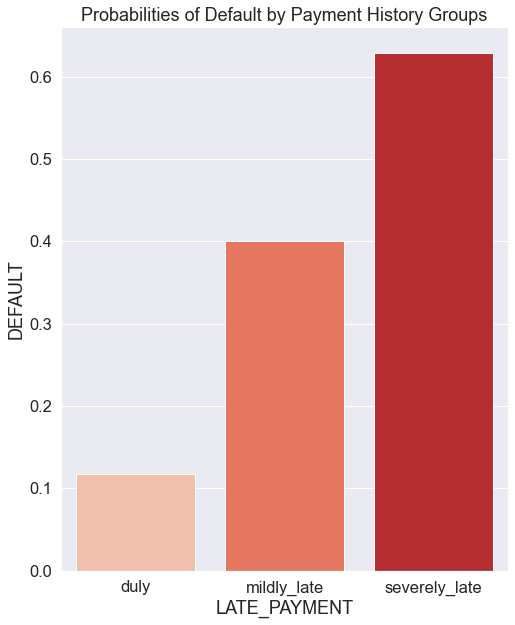

In [93]:
%matplotlib inline
plt.figure(figsize = (8,10))
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1.5)
ax = sns.barplot(data = df, 
             x = "LATE_PAYMENT", 
             y= "DEFAULT", 
            ci = None,
            palette= "Reds"#"Blues_d"
            ) \
    .set(title = "Probabilities of Default by Payment History Groups")

## Visualize Coefficients from Logistics Regression

In [94]:
# Logistic Regression 
# Make sure that the version of sklearn is 1.0 or above
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression(random_state=617, fit_intercept = False)
logistic_clf.fit(X_logis,y)

# See coeeficients
logistic_clf.coef_

array([[-0.35259496, -0.84081424, -0.49626581, -0.23951768, -0.179551  ,
        -1.2902319 , -0.72438707, -0.19987294, -0.64175537, -0.67212257,
         1.33859583,  2.18965255]])

In [95]:
[round((np.exp(x)-1)*100,4) for x in logistic_clf.coef_[0]]

[-29.7138,
 -56.8641,
 -39.12,
 -21.2993,
 -16.4355,
 -72.4793,
 -51.5378,
 -18.1165,
 -47.3632,
 -48.9376,
 281.3685,
 793.2109]

In [96]:
# Convert coefficient to an interpetable form
logistics_coef = pd.DataFrame({"Features" : logistic_clf.feature_names_in_,
                              "%Chg in Probability to Default" : [round((np.exp(x)-1)*100,1) for x in logistic_clf.coef_[0]]}) \
                    .sort_values(by = "%Chg in Probability to Default", ascending = False)
logistics_coef 

#If an error occurs, ckeck if version of sklearn is 1.0 is above

,Features,%Chg in Probability to Default
11,LATE_PAYMENT_severely_late,793.2
10,LATE_PAYMENT_mildly_late,281.4
4,EDUCATION_highschool,-16.4
7,MARRIAGE_others,-18.1
3,EDUCATION_university,-21.3
0,BILL_TO_CREDIT_higher_than_med,-29.7
2,SEX_female,-39.1
8,AGE_group_new_Adults (31 - 60),-47.4
9,AGE_group_new_Retired (60+),-48.9
6,MARRIAGE_single,-51.5


### Positive Coefficients (Reg Flag)

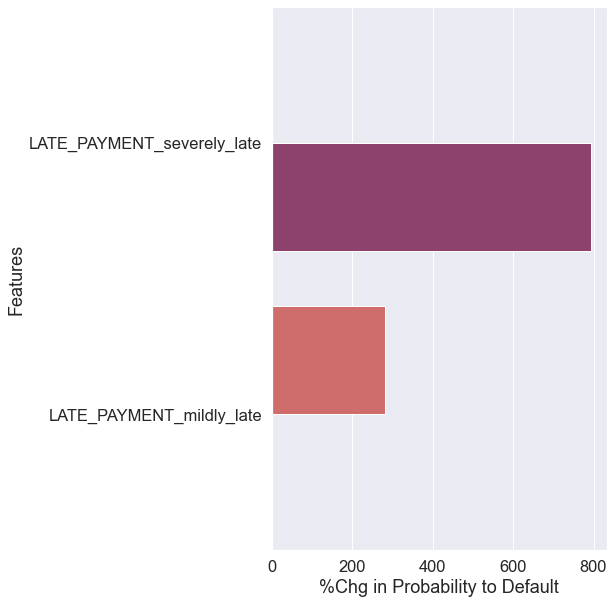

In [97]:
%matplotlib inline
plt.figure(figsize = (6,10))

sns.set_theme(style="darkgrid")
sns.set(font_scale = 1.5)
sns.barplot(data = logistics_coef[logistics_coef["%Chg in Probability to Default"] >= 0], 
             x = "%Chg in Probability to Default", 
             y= "Features", 
            ci = None,
            hue = "%Chg in Probability to Default",
            palette = "flare",
            )\
        .legend([],[], frameon=False)


### Negative Coefficients (Green Flag)

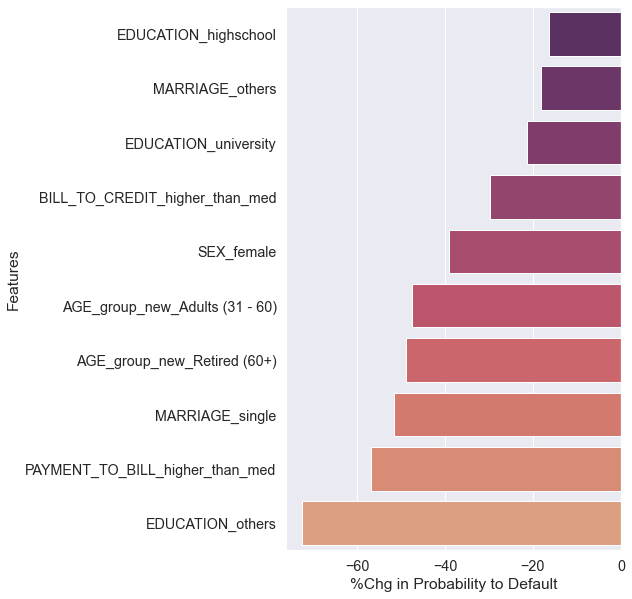

In [98]:
%matplotlib inline
plt.figure(figsize = (6,10))

sns.set_theme(style="darkgrid")
sns.set(font_scale = 1.3)

ax = sns.barplot(data = logistics_coef[logistics_coef["%Chg in Probability to Default"] < 0], 
             x = "%Chg in Probability to Default", 
             y= "Features", 
            ci = None,
            hue = "%Chg in Probability to Default",
            palette = "flare",
            dodge=False
            )

ax.legend([],[], frameon=False)

## Run Cross-Validation on Multiple Models

In [99]:
# Configure Models

# Logistic Regression 
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression(random_state=617)

# Decision Tree
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(max_depth=6, random_state=617, n_estimators = 500, n_jobs = 8)

# Support Vector Machine 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01,
    max_depth=2, random_state=617)

models = [logistic_clf, tree_clf, random_forest_clf, svm_clf, GB_clf]
model_names = ["Logistics Regression", "Decision Tree", "Random Forest", "Support Vector Machine", "Gradient Boosting Model"]


In [101]:
# Run Cross-Validation for Accuarcy and Recall

import warnings
warnings.filterwarnings("ignore")

# sklearn models 
from sklearn.model_selection import cross_validate
scoring = ['accuracy', 'recall']

CV_scores = {"Models" : [],
                "Accuracy" : [],
                "Recall" : []}
for index, item in enumerate(models):
    if index == 0:
        selected_X = X.iloc[:,3:]
    else:
        selected_X = X
    scores = cross_validate(item, selected_X, y, scoring=scoring, cv = 5)
    CV_scores["Models"].append(model_names[index])
    CV_scores["Accuracy"].append(np.mean(scores["test_accuracy"]*100))
    CV_scores["Recall"].append(np.mean(scores["test_recall"]*100))

CV_scores = pd.DataFrame(CV_scores)
CV_scores

,Models,Accuracy,Recall
0,Logistics Regression,78.533333,5.666702
1,Decision Tree,72.636667,40.491279
2,Random Forest,82.010000,35.503752
3,Support Vector Machine,81.883333,33.183090
4,Gradient Boosting Model,82.086667,36.016197


### Visualize %Accuracy and %Recall to Compare Performances

(65.0, 90.0)

<Figure size 576x864 with 0 Axes>

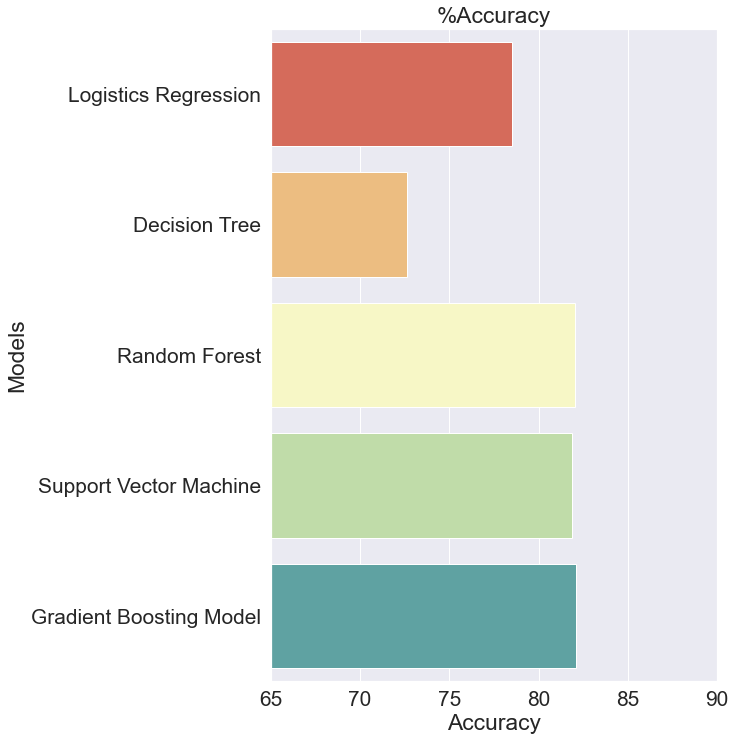

In [102]:
%matplotlib inline
plt.figure(figsize = (8,12))
plt.figure(figsize = (8,12))
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1.9)

sns.barplot(data = CV_scores, 
             x = "Accuracy", 
             y= "Models", 
            ci = None,
            palette= "Spectral"
            ).set(title = "%Accuracy") 

plt.xlim(65, 90)

(0.0, 50.0)

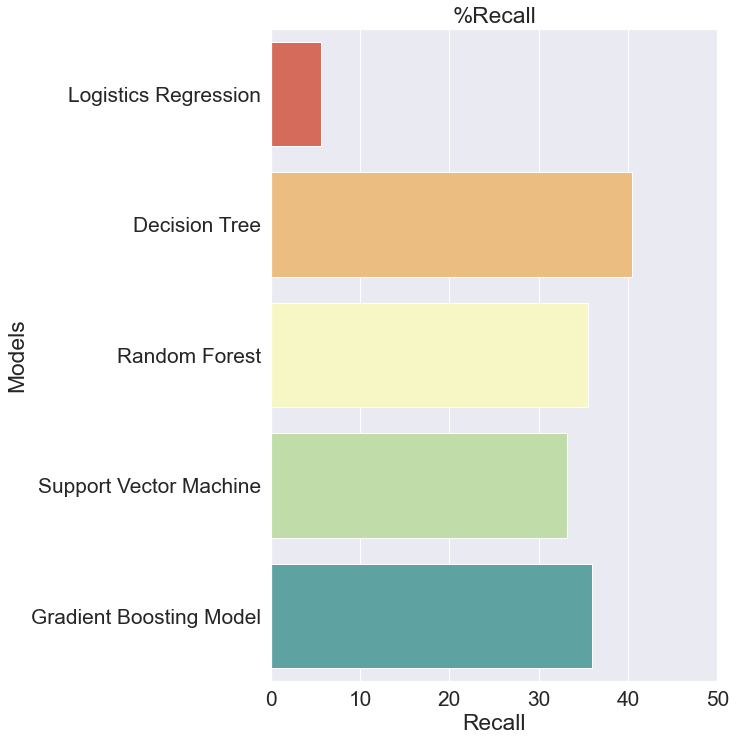

In [103]:
%matplotlib inline
plt.figure(figsize = (8,12))
sns.set_theme(style="darkgrid")
sns.set(font_scale = 1.9)

sns.barplot(data = CV_scores, 
             x = "Recall", 
             y= "Models", 
            ci = None,
            palette= "Spectral"
            ).set(title = "%Recall") 

plt.xlim(0, 50)